In [2]:
# Libraries

import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Connect table
DB_PATH = "../data/processed/HVT_Analysis_Final.db"
conn = sqlite3.connect(DB_PATH)
df = pd.read_sql("SELECT * FROM Physician_Nexus_Final_Strategy", conn)
conn.close()

print(f"Table Load Ready for Analysis with {len(df)} classified physicians.")

Table Load Ready for Analysis with 87297 classified physicians.


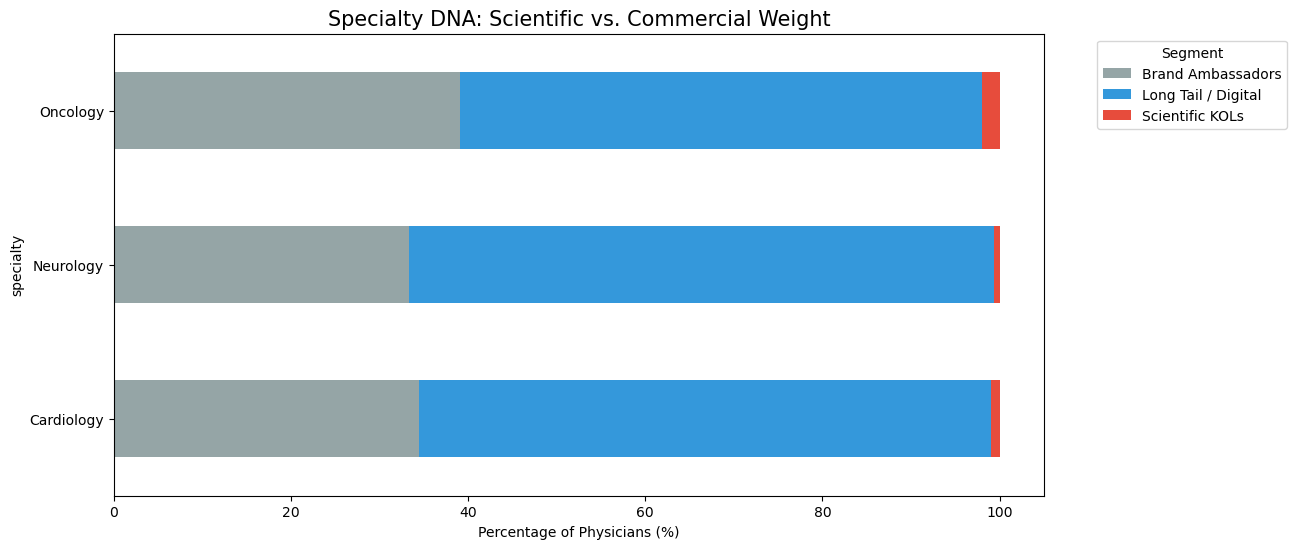

In [4]:
# Create a cross-tabulation of Specialty vs Segment
specialty_dist = pd.crosstab(df['specialty'], df['segment_name'], normalize='index') * 100

# Plotting the 'Scientific Weight' by Specialty
specialty_dist.plot(kind='barh', stacked=True, figsize=(12, 6), color=['#95a5a6', '#3498db', '#e74c3c'])
plt.title('Specialty DNA: Scientific vs. Commercial Weight', fontsize=15)
plt.xlabel('Percentage of Physicians (%)')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1))
plt.show()

In [5]:
# Filter for the Elite 991
kol_list = df[df['segment_name'] == 'Scientific KOLs'].copy()

# Sort by Total Spend to see the biggest influencers at the top
kol_list = kol_list.sort_values(by='total_spend', ascending=False)

# Export to CSV
kol_list.to_csv('../reports/Scientific_KOL_Target_List.csv', index=False)

print(f"Generated a target list of {len(kol_list)} KOLs.")
print("File saved in: /reports/Scientific_KOL_Target_List.csv")

Generated a target list of 991 KOLs.
File saved in: /reports/Scientific_KOL_Target_List.csv


<Figure size 1200x600 with 0 Axes>

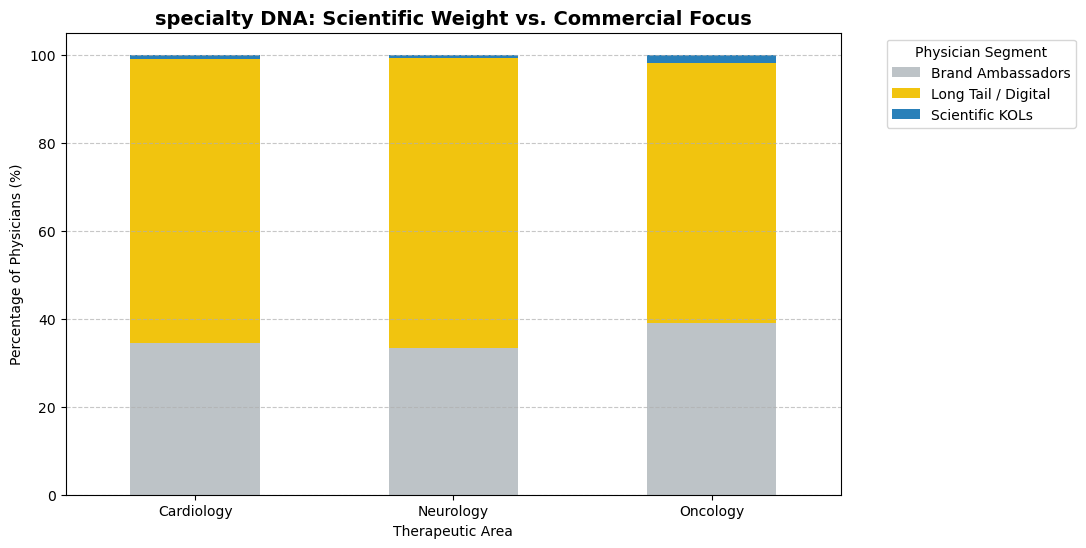

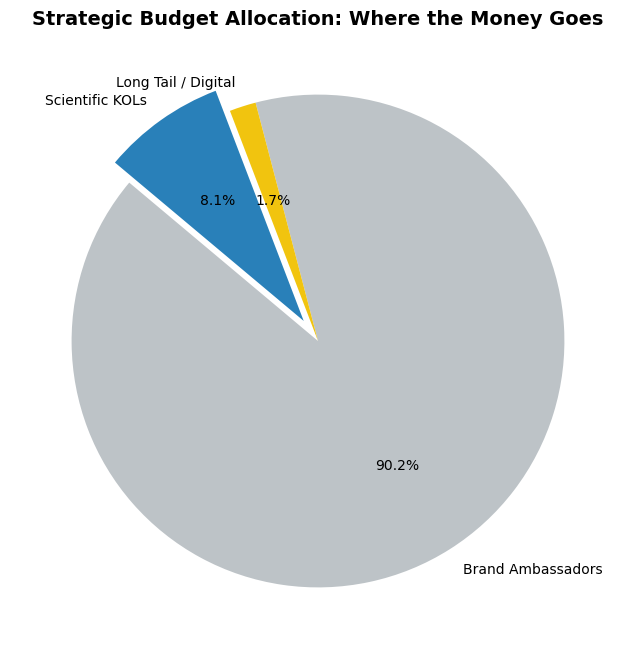

In [9]:
# Create a cross-tabulation (Normalized to 100%)
spec_dist = pd.crosstab(df['specialty'], df['segment_name'], normalize='index') * 100

plt.figure(figsize=(12, 6))
spec_dist.plot(kind='bar', stacked=True, figsize=(10,6), color=['#bdc3c7', '#f1c40f', '#2980b9'])
plt.title('specialty DNA: Scientific Weight vs. Commercial Focus', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Physicians (%)')
plt.xlabel('Therapeutic Area')
plt.legend(title='Physician Segment', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- BUDGET CONCENTRATION ---
# How much 'Total_Spend' the 991 KOLs eat compared to the others
budget_summary = df.groupby('segment_name')['total_spend'].sum()

plt.figure(figsize=(8, 8))
plt.pie(budget_summary, labels=budget_summary.index, autopct='%1.1f%%', 
        colors=['#bdc3c7', '#f1c40f', '#2980b9'], startangle=140, explode=(0, 0, 0.1))
plt.title('Strategic Budget Allocation: Where the Money Goes', fontsize=14, fontweight='bold')
plt.show()